<a href="https://colab.research.google.com/github/Meaiie/bsc_dpdm24/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_set = pd.read_csv('/content/drive/MyDrive/BSC_DPDM24/Model/train_set.csv')
train_set.head()

,id number,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|,Thal_Group
0,67d169,25.0,11.1,34.0,78.0,3.2,0.0,55.9,4.358974,25.464706,32.647059,40.341026,18.141026,2.0,1.535294,3.070588,Abnormal_variants
1,67l168,32.0,13.9,42.0,86.0,3.7,0.3,54.8,5.197674,28.859060,33.557047,35.802326,5.802326,6.0,1.859060,11.154362,Abnormal_variants
2,67i267,43.0,10.1,31.0,78.0,2.6,0.3,56.2,3.974359,25.412903,32.580645,43.725641,23.525641,2.0,1.587097,3.174194,Abnormal_variants
3,67e248,33.0,12.9,38.0,76.0,3.0,0.2,61.2,5.000000,25.800000,33.947368,32.300000,6.500000,4.0,1.200000,4.800000,Abnormal_variants
4,67h277,23.0,12.9,40.0,78.0,3.1,0.0,55.6,5.128205,25.155000,32.250000,34.171795,8.371795,2.0,1.845000,3.690000,Abnormal_variants


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id number          4322 non-null   object 
 1   Xn                 3887 non-null   float64
 2   Hb(Gm%)            4315 non-null   float64
 3   Hct(%)             4315 non-null   float64
 4   MCV(fl)            4315 non-null   float64
 5   A2 (2-3%)          4189 non-null   float64
 6   HbF (2%)           4206 non-null   float64
 7   HbA (95-97%)       4206 non-null   float64
 8   RBC                4315 non-null   float64
 9   MCH                4315 non-null   float64
 10  MCHC               4315 non-null   float64
 11  MCV-RBC-3*HGB      4315 non-null   float64
 12  MCV-RBC-5*HGB      4315 non-null   float64
 13  |80-MCV|           4315 non-null   float64
 14  |27-MCH|           4315 non-null   float64
 15  |80-MCV|*|27-MCH|  4315 non-null   float64
 16  Thal_Group         4322 

In [7]:
train_set['Thal_Group'].value_counts()

,count
Thal_Group,
Normal,1878
HbE_related,1025
Alpha_thal_related,959
Beta_thal_related,439
Abnormal_variants,18
Complex_genotypes,3


In [23]:
train_set.columns

Index(['id number', 'Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)',
       'HbF (2%)', 'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
       'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|',
       'Thal_Group', 'Thal_Group_num', 'Thal_Group_encoded'],
      dtype='object')

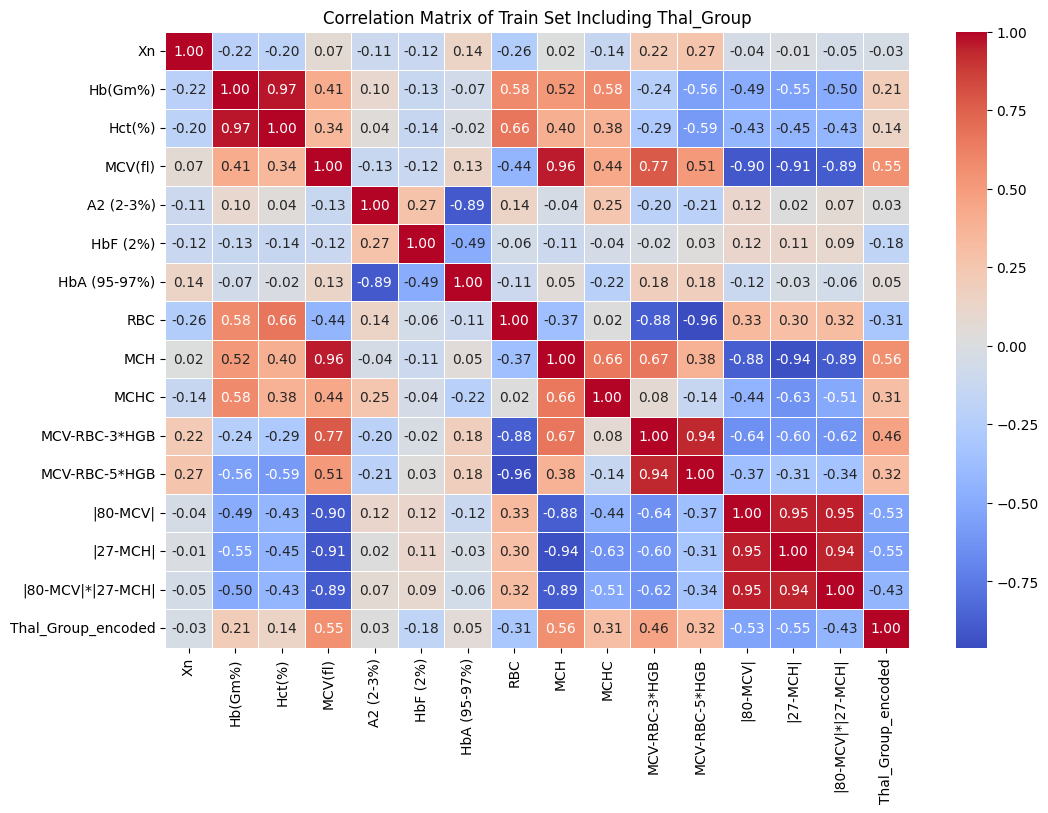

In [51]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# รวมคอลัมน์ตัวเลขทั้งหมด (รวม Thal_Group_num) สำหรับการคำนวณ correlation
numeric_columns = train_set.select_dtypes(include=['float64', 'int64']).columns

# คำนวณ correlation matrix
corr_matrix = train_set[numeric_columns].corr()

# กำหนดขนาดของกราฟ
plt.figure(figsize=(12, 8))

# สร้าง heatmap ด้วย Seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# ตั้งชื่อกราฟ
plt.title("Correlation Matrix of Train Set Including Thal_Group")
plt.show()



## เติมค่า A2 ,HbF และ HbA2
เนื่องจาก HbA, A2 และ HbF ควรรวมกันได้ 100% หรือใกล้เคียงกับ 100% เนื่องจากเป็นองค์ประกอบของฮีโมโกลบิน
1. คำนวณค่าหากมีข้อมูลทั้ง 2 คอลัมน์ครบ
2. เติมค่าโดยอิงจากค่าเฉลี่ยของ Thai_Group

In [11]:
# เติมค่า HbA ถ้ามีค่า HbF และ A2 อยู่
mask_hba = train_set['HbA (95-97%)'].isna()
train_set.loc[mask_hba, 'HbA (95-97%)'] = \
    100 - (train_set['A2 (2-3%)'] + train_set['HbF (2%)'])

# เติมค่า HbF ถ้ามีค่า HbA และ A2 อยู่
mask_hbf = train_set['HbF (2%)'].isna()
train_set.loc[mask_hbf, 'HbF (2%)'] = \
    100 - (train_set['A2 (2-3%)'] + train_set['HbA (95-97%)'])

# เติมค่า A2 ถ้ามีค่า HbA และ HbF อยู่
mask_a2 = train_set['A2 (2-3%)'].isna()
train_set.loc[mask_a2, 'A2 (2-3%)'] = \
    100 - (train_set['HbA (95-97%)'] + train_set['HbF (2%)'])

# เติมค่าที่เหลือจากค่าเฉลี่ยของ Thal_Group (ถ้ายังมี NaN)
for col in ['HbA (95-97%)', 'HbF (2%)', 'A2 (2-3%)']:
    train_set[col] = train_set.groupby('Thal_Group')[col].transform(lambda x: x.fillna(x.mean()))

## เติมค่า Xn

In [43]:
train_set['Xn'].value_counts()

,count
Xn,
1.0,255
34.0,100
32.0,94
30.0,90
31.0,88
...,...
93.0,4
90.0,3
92.0,3


In [45]:
from sklearn.impute import KNNImputer

# สร้าง KNNImputer
imputer = KNNImputer(n_neighbors=3)

# เติมค่าว่างในคอลัมน์ Xn โดยใช้ KNNImputer
train_set[['Xn']] = imputer.fit_transform(train_set[['Xn']])

# ตรวจสอบว่าค่าว่างใน Xn ถูกเติมไปแล้วหรือยัง
print(train_set['Xn'].isnull().sum())  # ควรจะได้ค่า 0

0


# Model Selection

เอาทุกตัวแปรเข้าในที่นี้ ไม่รวม id

In [ ]:
# แปลง 'Thal_Group' เป็นตัวเลข
label_encoder = LabelEncoder()
train_set['Thal_Group_encoded'] = label_encoder.fit_transform(train_set['Thal_Group'])

In [28]:
train_set.head()

,id number,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|,Thal_Group,Thal_Group_encoded
0,67d169,25.0,11.1,34.0,78.0,3.2,0.0,55.9,4.358974,25.464706,32.647059,40.341026,18.141026,2.0,1.535294,3.070588,Abnormal_variants,0
1,67l168,32.0,13.9,42.0,86.0,3.7,0.3,54.8,5.197674,28.859060,33.557047,35.802326,5.802326,6.0,1.859060,11.154362,Abnormal_variants,0
2,67i267,43.0,10.1,31.0,78.0,2.6,0.3,56.2,3.974359,25.412903,32.580645,43.725641,23.525641,2.0,1.587097,3.174194,Abnormal_variants,0
3,67e248,33.0,12.9,38.0,76.0,3.0,0.2,61.2,5.000000,25.800000,33.947368,32.300000,6.500000,4.0,1.200000,4.800000,Abnormal_variants,0
4,67h277,23.0,12.9,40.0,78.0,3.1,0.0,55.6,5.128205,25.155000,32.250000,34.171795,8.371795,2.0,1.845000,3.690000,Abnormal_variants,0


## Decision Tree

### เอาทุกตัวแปรเข้า

Decision Tree (Default) Performance:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.77      0.80       201
           2       0.97      0.99      0.98        96
           3       0.00      0.00      0.00         0
           4       1.00      0.98      0.99       230
           5       0.87      0.91      0.89       335

    accuracy                           0.91       865
   macro avg       0.72      0.72      0.72       865
weighted avg       0.91      0.91      0.91       865



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


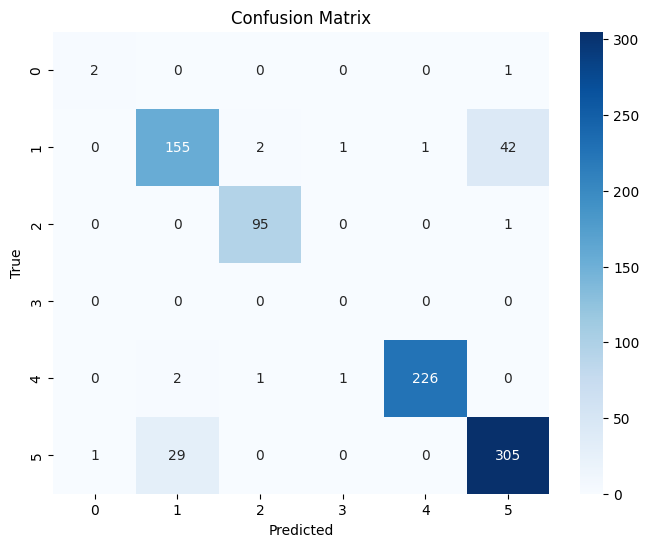

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded','id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# สร้างโมเดล Decision Tree (Default)
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train_encoded)

# ทำนายผล
y_pred_dt_default = dt_default.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Decision Tree (Default) Performance:")
print(classification_report(y_test_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Cross-Validation Scores (5-folds): [0.90520231 0.90404624 0.90972222 0.90509259 0.89351852]
Mean Accuracy: 0.9035
Standard Deviation: 0.0054
Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       959
           2       1.00      1.00      1.00       439
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1025
           5       1.00      1.00      1.00      1878

    accuracy                           1.00      4322
   macro avg       1.00      1.00      1.00      4322
weighted avg       1.00      1.00      1.00      4322



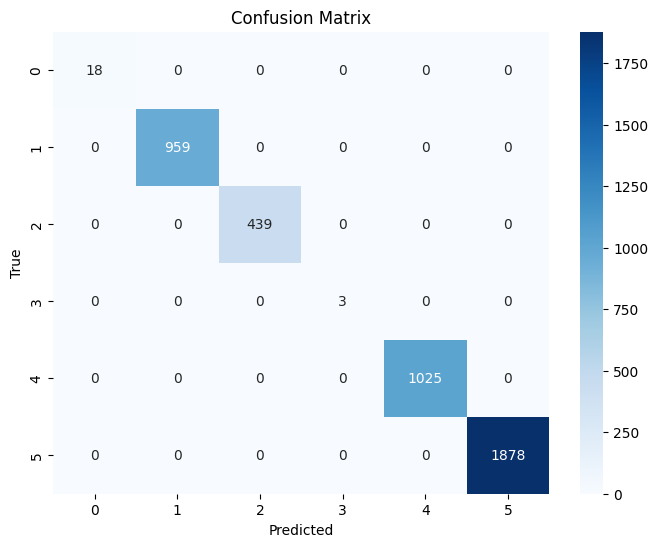

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded','id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder และ fit กับ y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล Decision Tree (Default)
dt_default = DecisionTreeClassifier(random_state=42)

# ใช้ KFold เพื่อแบ่งข้อมูลเป็น 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ทำ cross-validation
cross_val_results = cross_val_score(dt_default, X, y_encoded, cv=kf, scoring='accuracy')

# แสดงผลลัพธ์ cross-validation
print(f"Cross-Validation Scores (5-folds): {cross_val_results}")
print(f"Mean Accuracy: {np.mean(cross_val_results):.4f}")
print(f"Standard Deviation: {np.std(cross_val_results):.4f}")

# ฝึกโมเดลด้วยข้อมูลทั้งหมด
dt_default.fit(X, y_encoded)

# ทำนายผล
y_pred_dt_default = dt_default.predict(X)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_original = label_encoder.inverse_transform(y_encoded)

# ประเมินผลโมเดล
print("Decision Tree Performance:")
print(classification_report(y_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### drop Xn และ MCV(fl)




Decision Tree (Default) Performance:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      0.78      0.82       201
           2       0.97      0.99      0.98        96
           3       0.00      0.00      0.00         0
           4       1.00      0.98      0.99       230
           5       0.88      0.93      0.91       335

    accuracy                           0.92       865
   macro avg       0.78      0.73      0.75       865
weighted avg       0.92      0.92      0.92       865



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


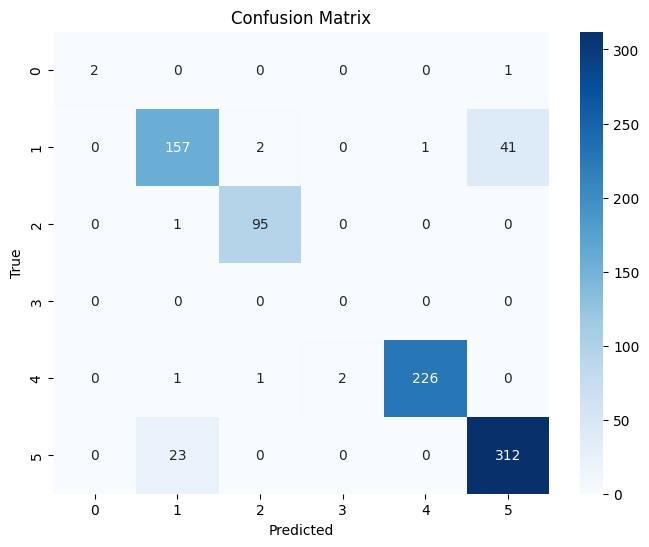

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded','id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# สร้างโมเดล Decision Tree (Default)
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train_encoded)

# ทำนายผล
y_pred_dt_default = dt_default.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Decision Tree (Default) Performance:")
print(classification_report(y_test_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Cross-Validation Scores (5-folds): [0.91560694 0.90867052 0.92361111 0.90162037 0.87731481]
Mean Accuracy: 0.9054
Standard Deviation: 0.0158
Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       959
           2       1.00      1.00      1.00       439
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1025
           5       1.00      1.00      1.00      1878

    accuracy                           1.00      4322
   macro avg       1.00      1.00      1.00      4322
weighted avg       1.00      1.00      1.00      4322



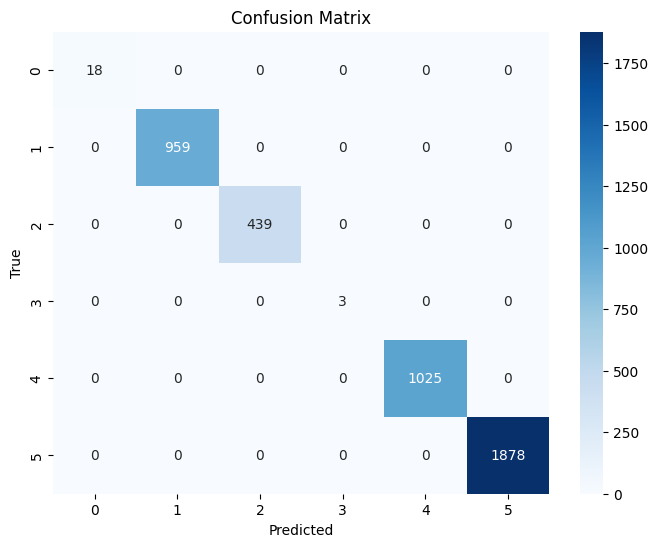

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded','id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder และ fit กับ y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล Decision Tree (Default)
dt_default = DecisionTreeClassifier(random_state=42)

# ใช้ KFold เพื่อแบ่งข้อมูลเป็น 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ทำ cross-validation
cross_val_results = cross_val_score(dt_default, X, y_encoded, cv=kf, scoring='accuracy')

# แสดงผลลัพธ์ cross-validation
print(f"Cross-Validation Scores (5-folds): {cross_val_results}")
print(f"Mean Accuracy: {np.mean(cross_val_results):.4f}")
print(f"Standard Deviation: {np.std(cross_val_results):.4f}")

# ฝึกโมเดลด้วยข้อมูลทั้งหมด
dt_default.fit(X, y_encoded)

# ทำนายผล
y_pred_dt_default = dt_default.predict(X)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_original = label_encoder.inverse_transform(y_encoded)

# ประเมินผลโมเดล
print("Decision Tree Performance:")
print(classification_report(y_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### ตัวแปรที่เอาเข้ามาทำนาย y มีความสัมพันธ์ตั้งแต่ 0.30 ขึ้นไป

Decision Tree (Default) Performance:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.73      0.66      0.69       201
           2       0.79      0.76      0.78        96
           4       0.66      0.65      0.65       230
           5       0.73      0.79      0.76       335

    accuracy                           0.72       865
   macro avg       0.63      0.64      0.63       865
weighted avg       0.72      0.72      0.72       865



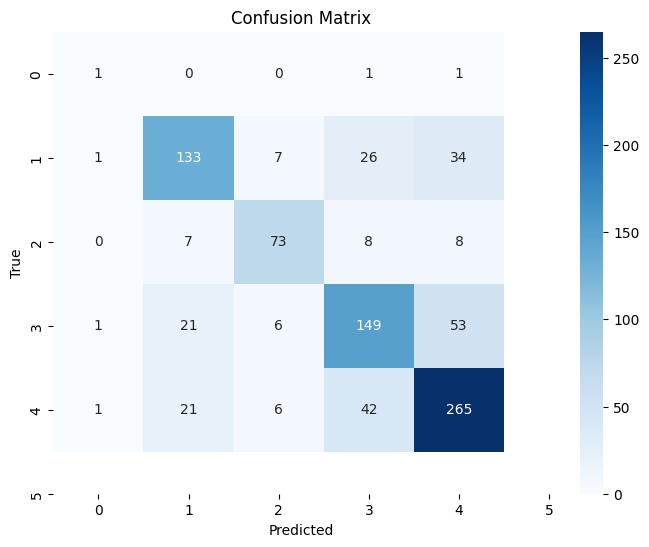

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
# เลือกแค่ตัวแปรที่ต้องการ
X = train_set[['MCV(fl)', 'MCH', 'RBC', 'MCHC', 'MCV-RBC-3*HGB', 'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']]
y = train_set['Thal_Group_encoded']

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# สร้างโมเดล Decision Tree (Default)
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train_encoded)

# ทำนายผล
y_pred_dt_default = dt_default.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Decision Tree (Default) Performance:")
print(classification_report(y_test_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### ตัวแปรมีความสัมพันธ์ตั้งแต่ 0.5

Decision Tree (Default) Performance:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.65      0.65      0.65       201
           2       0.73      0.72      0.72        96
           3       0.00      0.00      0.00         0
           4       0.67      0.60      0.64       230
           5       0.70      0.76      0.73       335

    accuracy                           0.69       865
   macro avg       0.63      0.51      0.54       865
weighted avg       0.69      0.69      0.69       865



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


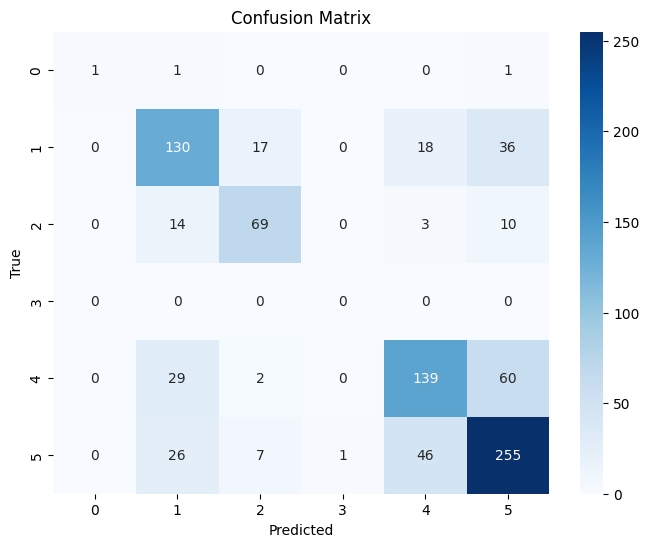

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
# เลือกแค่ตัวแปรที่ต้องการ
X = train_set[['MCV(fl)', 'MCH','|80-MCV|', '|27-MCH|']]
y = train_set['Thal_Group_encoded']

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# สร้างโมเดล Decision Tree (Default)
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train_encoded)

# ทำนายผล
y_pred_dt_default = dt_default.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Decision Tree (Default) Performance:")
print(classification_report(y_test_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## (Short) Decision Tree
ใช้ GridSearch

### เอาทุกตัวแปรเข้า

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from GridSearch: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree (GridSearch) Performance:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      0.86      0.87       201
           2       0.97      0.99      0.98        96
           4       1.00      0.99      0.99       230
           5       0.92      0.94      0.93       335

    accuracy                           0.94       865
   macro avg       0.95      0.89      0.92       865
weighted avg       0.94      0.94      0.94       865



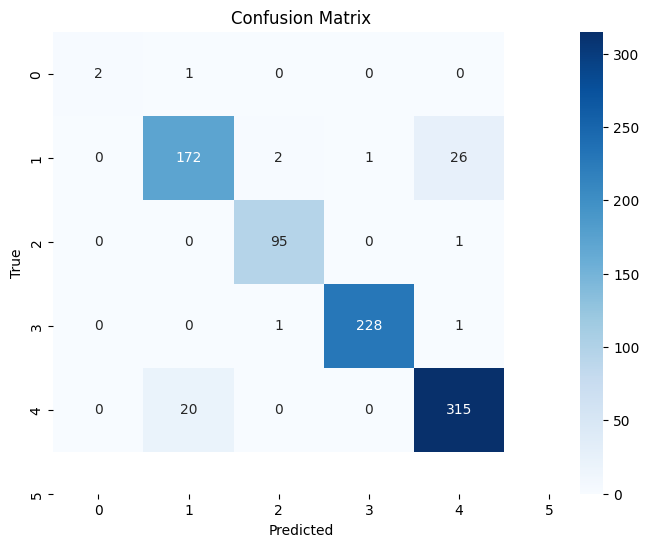

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# สร้างโมเดล Decision Tree
dt_default = DecisionTreeClassifier(random_state=42)

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=dt_default, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_dt_default = grid_search.best_estimator_.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Decision Tree (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Performance with 5-fold Cross Validation:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.82      0.84      0.83       959
           2       0.98      0.97      0.97       439
           3       0.00      0.00      0.00         3
           4       0.98      0.99      0.99      1025
           5       0.92      0.91      0.91      1878

    accuracy                           0.92      4322
   macro avg       0.77      0.75      0.76      4322
weighted avg       0.92      0.92      0.92      4322



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


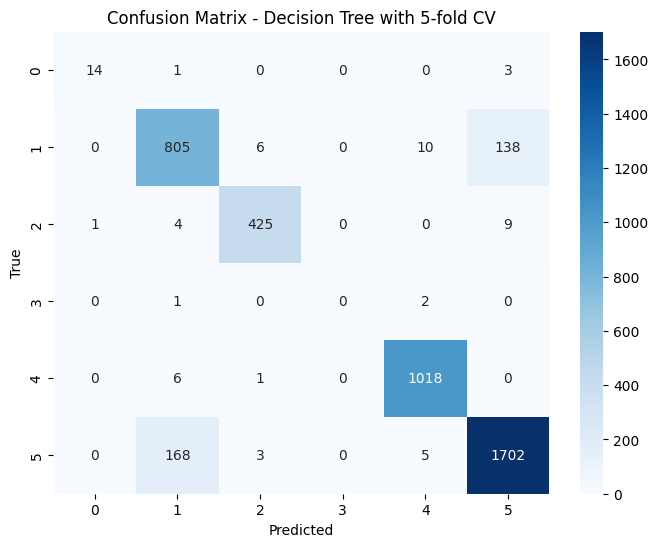

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล Decision Tree ด้วยพารามิเตอร์ที่ดีที่สุดจาก GridSearch
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

# สร้าง StratifiedKFold เพื่อให้การแบ่งข้อมูลแต่ละ fold สะท้อนถึงการกระจายของข้อมูลในแต่ละคลาส
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ใช้ k-fold cross-validation
y_pred = []
y_true = []

for train_index, val_index in kf.split(X, y_encoded):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # ฝึกโมเดล
    dt_model.fit(X_train, y_train)

    # ทำนายผล
    y_pred_fold = dt_model.predict(X_val)

    # เก็บผลลัพธ์
    y_pred.extend(y_pred_fold)
    y_true.extend(y_val)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_original = label_encoder.inverse_transform(y_pred)
y_true_original = label_encoder.inverse_transform(y_true)

# ประเมินผลโมเดล
print("Decision Tree Performance with 5-fold Cross Validation:")
print(classification_report(y_true_original, y_pred_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_true_original, y_pred_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree with 5-fold CV')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


Decision Tree Performance with 4-fold Cross Validation:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.82      0.82      0.82       959
           2       0.98      0.97      0.97       439
           3       0.00      0.00      0.00         3
           4       0.98      0.99      0.99      1025
           5       0.91      0.91      0.91      1878

    accuracy                           0.91      4322
   macro avg       0.74      0.74      0.74      4322
weighted avg       0.91      0.91      0.91      4322



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


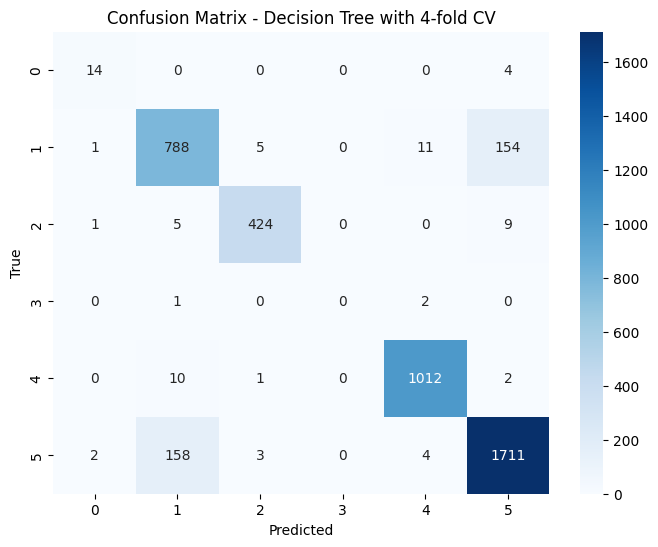

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล Decision Tree ด้วยพารามิเตอร์ที่ดีที่สุดจาก GridSearch
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

# สร้าง StratifiedKFold เพื่อให้การแบ่งข้อมูลแต่ละ fold สะท้อนถึงการกระจายของข้อมูลในแต่ละคลาส
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# ใช้ k-fold cross-validation
y_pred = []
y_true = []

for train_index, val_index in kf.split(X, y_encoded):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # ฝึกโมเดล
    dt_model.fit(X_train, y_train)

    # ทำนายผล
    y_pred_fold = dt_model.predict(X_val)

    # เก็บผลลัพธ์
    y_pred.extend(y_pred_fold)
    y_true.extend(y_val)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_original = label_encoder.inverse_transform(y_pred)
y_true_original = label_encoder.inverse_transform(y_true)

# ประเมินผลโมเดล
print("Decision Tree Performance with 4-fold Cross Validation:")
print(classification_report(y_true_original, y_pred_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_true_original, y_pred_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree with 4-fold CV')
plt.show()


### drop Xn และ MCV(fl)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from GridSearch: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree (GridSearch) Performance:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      0.86      0.86       201
           2       0.97      0.97      0.97        96
           4       1.00      0.98      0.99       230
           5       0.92      0.93      0.92       335

    accuracy                           0.93       865
   macro avg       0.95      0.88      0.91       865
weighted avg       0.93      0.93      0.93       865



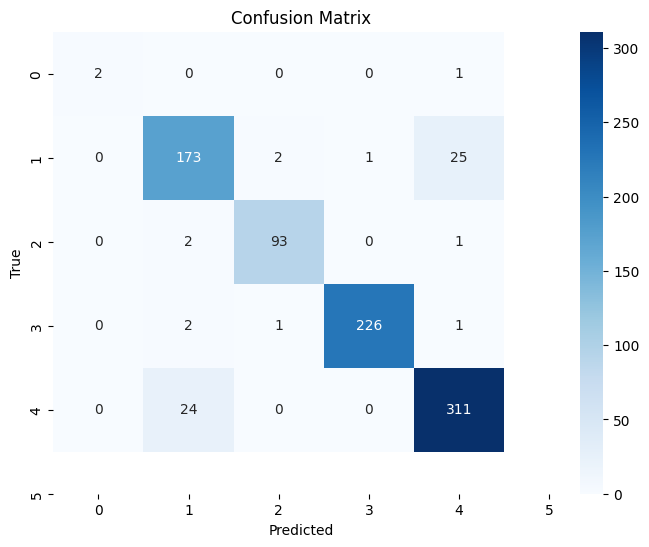

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# สร้างโมเดล Decision Tree
dt_default = DecisionTreeClassifier(random_state=42)

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=dt_default, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_dt_default = grid_search.best_estimator_.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Decision Tree (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Performance with 5-fold Cross Validation:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.82      0.83      0.82       959
           2       0.97      0.97      0.97       439
           3       0.00      0.00      0.00         3
           4       0.98      0.99      0.99      1025
           5       0.92      0.91      0.91      1878

    accuracy                           0.91      4322
   macro avg       0.74      0.75      0.75      4322
weighted avg       0.92      0.91      0.91      4322



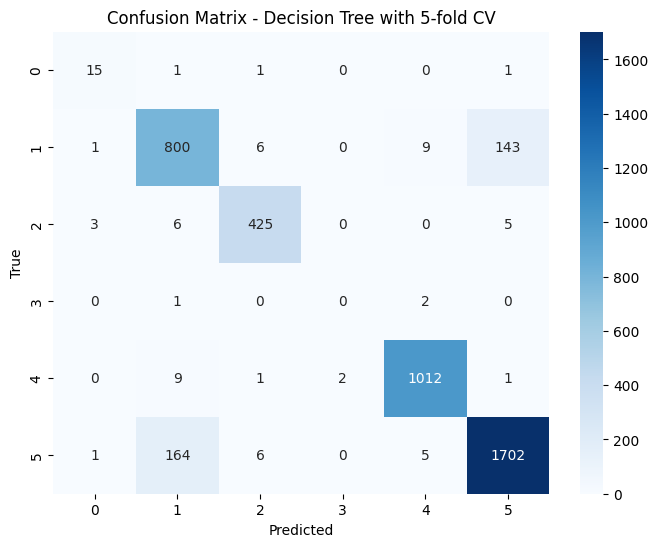

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล Decision Tree ด้วยพารามิเตอร์ที่ดีที่สุดจาก GridSearch
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

# สร้าง StratifiedKFold เพื่อให้การแบ่งข้อมูลแต่ละ fold สะท้อนถึงการกระจายของข้อมูลในแต่ละคลาส
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ใช้ k-fold cross-validation
y_pred = []
y_true = []

for train_index, val_index in kf.split(X, y_encoded):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # ฝึกโมเดล
    dt_model.fit(X_train, y_train)

    # ทำนายผล
    y_pred_fold = dt_model.predict(X_val)

    # เก็บผลลัพธ์
    y_pred.extend(y_pred_fold)
    y_true.extend(y_val)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_original = label_encoder.inverse_transform(y_pred)
y_true_original = label_encoder.inverse_transform(y_true)

# ประเมินผลโมเดล
print("Decision Tree Performance with 5-fold Cross Validation:")
print(classification_report(y_true_original, y_pred_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_true_original, y_pred_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree with 5-fold CV')
plt.show()


### ความสัมพันธ์ตั้งแต่ 0.3

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from GridSearch: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree (GridSearch) Performance:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.68      0.79      0.73       201
           2       0.80      0.73      0.77        96
           4       0.77      0.65      0.71       230
           5       0.78      0.80      0.79       335

    accuracy                           0.75       865
   macro avg       0.66      0.66      0.66       865
weighted avg       0.75      0.75      0.75       865



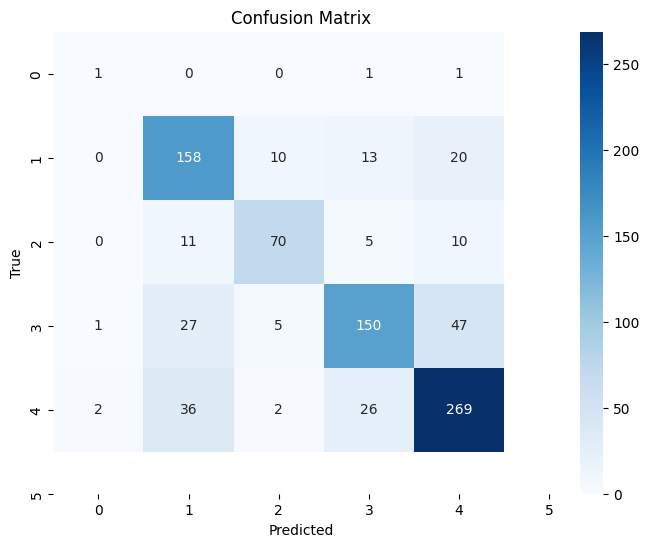

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set[['MCV(fl)', 'MCH', 'RBC', 'MCHC', 'MCV-RBC-3*HGB', 'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']]
y = train_set['Thal_Group_encoded']

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# สร้างโมเดล Decision Tree
dt_default = DecisionTreeClassifier(random_state=42)

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=dt_default, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_dt_default = grid_search.best_estimator_.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Decision Tree (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### ความสัมพันธ์ตั้งแต่ 0.5

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from GridSearch: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree (GridSearch) Performance:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.63      0.92      0.75       201
           2       0.91      0.67      0.77        96
           4       0.75      0.57      0.65       230
           5       0.80      0.77      0.78       335

    accuracy                           0.74       865
   macro avg       0.72      0.65      0.67       865
weighted avg       0.76      0.74      0.74       865



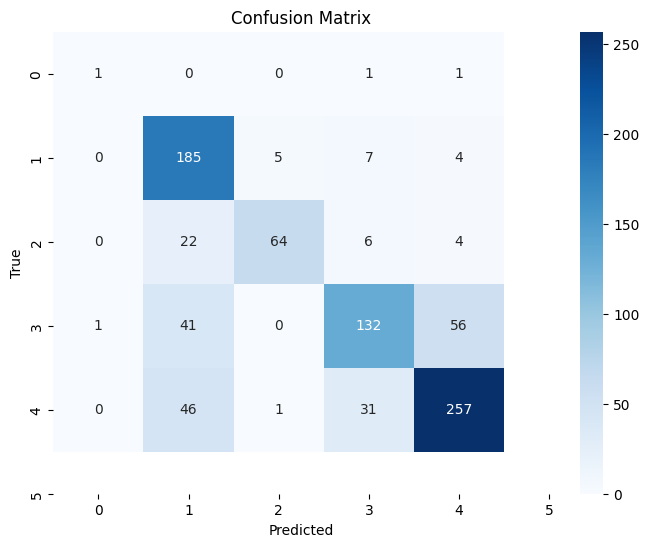

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set[['MCV(fl)', 'MCH','|80-MCV|', '|27-MCH|']]
y = train_set['Thal_Group_encoded']

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# สร้างโมเดล Decision Tree
dt_default = DecisionTreeClassifier(random_state=42)

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=dt_default, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_dt_default = grid_search.best_estimator_.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_dt_default_original = label_encoder.inverse_transform(y_pred_dt_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Decision Tree (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_dt_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_dt_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Naive Bayes

### เอาทุกตัวแปรเข้า

Xn                   0
Hb(Gm%)              5
Hct(%)               5
MCV(fl)              5
A2 (2-3%)            0
HbF (2%)             0
HbA (95-97%)         0
RBC                  5
MCH                  5
MCHC                 5
MCV-RBC-3*HGB        5
MCV-RBC-5*HGB        5
|80-MCV|             5
|27-MCH|             5
|80-MCV|*|27-MCH|    5
dtype: int64
Best Parameters from GridSearch: {'var_smoothing': 1e-09}
Naive Bayes (GridSearch) Performance:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.59      0.45      0.51       201
           2       0.46      0.84      0.59        96
           3       0.00      0.00      0.00         0
           4       0.96      0.88      0.92       230
           5       0.88      0.83      0.85       335

    accuracy                           0.75       865
   macro avg       0.54      0.61      0.55       865
weighted avg       0.78      0.75      0.76       865



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_d

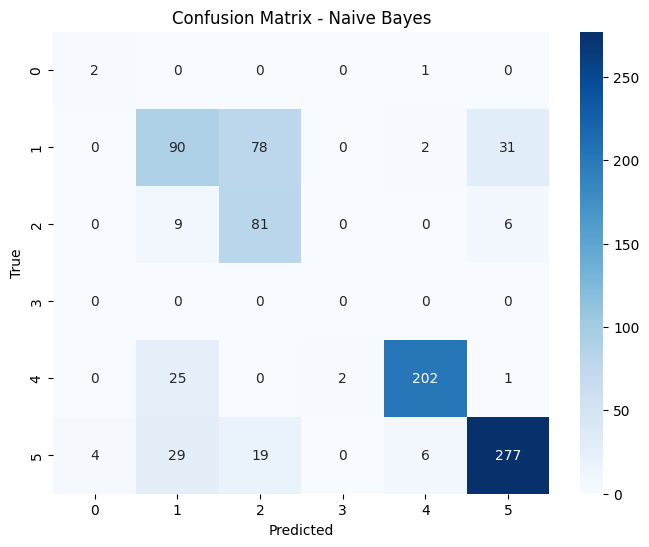

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ตรวจสอบค่าที่หายไป
print(X_train.isnull().sum())

# ใช้ SimpleImputer เพื่อเติมค่าที่หายไป
imputer = SimpleImputer(strategy='mean')  # ใช้ค่าเฉลี่ยเติมช่องว่าง
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # ค่าที่จะลองใช้สำหรับ var_smoothing ซึ่งควบคุมความยืดหยุ่นของโมเดล
}

# สร้างโมเดล Naive Bayes (GaussianNB)
nb_model = GaussianNB()

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_imputed, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_nb = grid_search.best_estimator_.predict(X_test_imputed)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_nb_original = label_encoder.inverse_transform(y_pred_nb)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Naive Bayes (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_nb_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_nb_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


Cross-Validation Scores (5-folds): [0.75375723 0.83121387 0.74074074 0.72569444 0.75578704]
Mean Accuracy: 0.7614
Standard Deviation: 0.0365
Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.53      0.94      0.68        18
           1       0.53      0.40      0.46       959
           2       0.45      0.85      0.59       439
           3       0.20      0.67      0.31         3
           4       0.95      0.88      0.91      1025
           5       0.88      0.83      0.85      1878

    accuracy                           0.75      4322
   macro avg       0.59      0.76      0.63      4322
weighted avg       0.77      0.75      0.75      4322



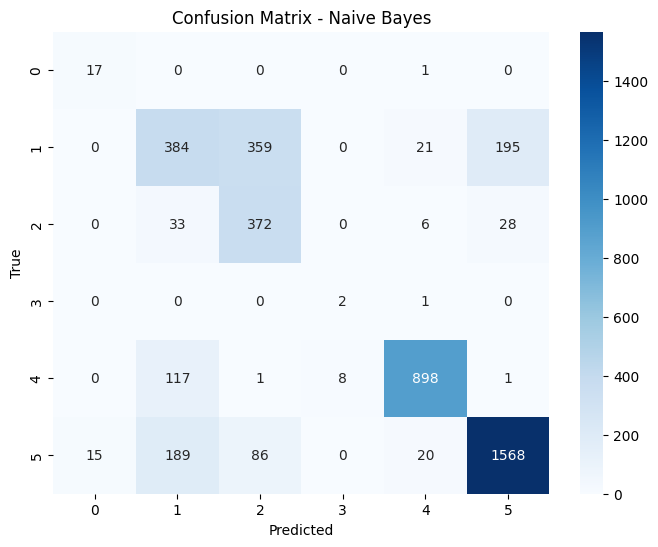

In [80]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder และ fit กับ y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# ใช้ SimpleImputer เพื่อเติมค่าที่หายไป
imputer = SimpleImputer(strategy='mean')  # ใช้ค่าเฉลี่ยเติมช่องว่าง
X_imputed = imputer.fit_transform(X)

# สร้างโมเดล Naive Bayes (GaussianNB)
nb_model = GaussianNB()

# ใช้ KFold เพื่อแบ่งข้อมูลเป็น 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ทำ cross-validation
cross_val_results = cross_val_score(nb_model, X_imputed, y_encoded, cv=kf, scoring='accuracy')

# แสดงผลลัพธ์ cross-validation
print(f"Cross-Validation Scores (5-folds): {cross_val_results}")
print(f"Mean Accuracy: {np.mean(cross_val_results):.4f}")
print(f"Standard Deviation: {np.std(cross_val_results):.4f}")

# ฝึกโมเดลด้วยข้อมูลทั้งหมด
nb_model.fit(X_imputed, y_encoded)

# ทำนายผล
y_pred_nb = nb_model.predict(X_imputed)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_nb_original = label_encoder.inverse_transform(y_pred_nb)
y_original = label_encoder.inverse_transform(y_encoded)

# ประเมินผลโมเดล
print("Naive Bayes Performance:")
print(classification_report(y_original, y_pred_nb_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_original, y_pred_nb_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

### drop Xn และ MCV(fl)

Hb(Gm%)              5
Hct(%)               5
A2 (2-3%)            0
HbF (2%)             0
HbA (95-97%)         0
RBC                  5
MCH                  5
MCHC                 5
MCV-RBC-3*HGB        5
MCV-RBC-5*HGB        5
|80-MCV|             5
|27-MCH|             5
|80-MCV|*|27-MCH|    5
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Parameters from GridSearch: {'var_smoothing': 1e-09}
Naive Bayes (GridSearch) Performance:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.59      0.42      0.49       201
           2       0.49      0.83      0.62        96
           3       0.00      0.00      0.00         0
           4       0.96      0.88      0.92       230
           5       0.86      0.87      0.87       335

    accuracy                           0.76       865
   macro avg       0.55      0.61      0.56       865
weighted avg       0.78      0.76      0.76       865



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


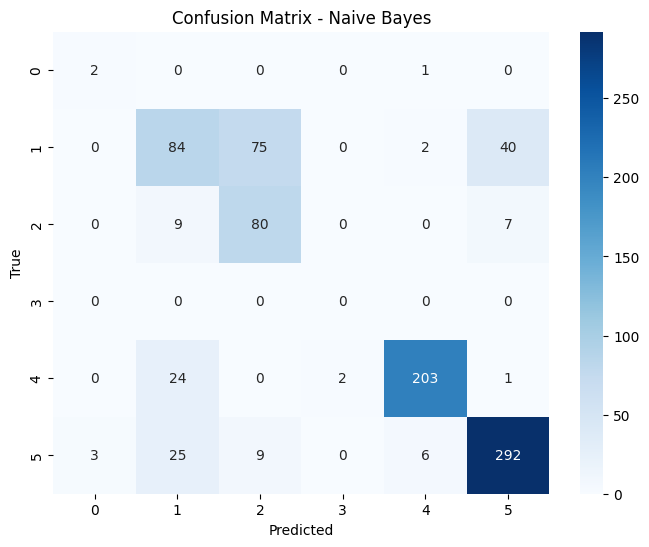

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ตรวจสอบค่าที่หายไป
print(X_train.isnull().sum())

# ใช้ SimpleImputer เพื่อเติมค่าที่หายไป
imputer = SimpleImputer(strategy='mean')  # ใช้ค่าเฉลี่ยเติมช่องว่าง
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # ค่าที่จะลองใช้สำหรับ var_smoothing ซึ่งควบคุมความยืดหยุ่นของโมเดล
}

# สร้างโมเดล Naive Bayes (GaussianNB)
nb_model = GaussianNB()

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_imputed, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_nb = grid_search.best_estimator_.predict(X_test_imputed)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_nb_original = label_encoder.inverse_transform(y_pred_nb)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Naive Bayes (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_nb_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_nb_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


## Random Forest

### เอาทุกตัวแปรเข้า

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from GridSearch: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest (GridSearch) Performance:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      0.89      0.89       201
           2       0.97      0.98      0.97        96
           4       0.99      0.99      0.99       230
           5       0.94      0.94      0.94       335

    accuracy                           0.94       865
   macro avg       0.96      0.89      0.92       865
weighted avg       0.94      0.94      0.94       865



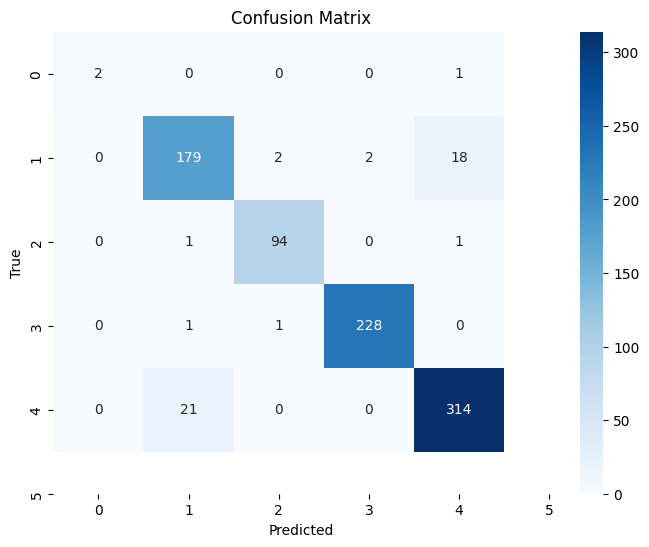

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],  # จำนวนต้นไม้ใน Random Forest
    'max_depth': [None, 10, 20, 30],   # ความลึกของแต่ละต้นไม้
    'min_samples_split': [2, 5, 10],   # จำนวนตัวอย่างขั้นต่ำที่ใช้ในการแบ่ง node
    'min_samples_leaf': [1, 2, 4],     # จำนวนตัวอย่างขั้นต่ำที่ต้องการที่ leaf node
    'bootstrap': [True, False]         # การใช้ bootstrap ในการฝึกโมเดล
}

# สร้างโมเดล Random Forest
rf_default = RandomForestClassifier(random_state=42)

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=rf_default, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_rf_default = grid_search.best_estimator_.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_rf_default_original = label_encoder.inverse_transform(y_pred_rf_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Random Forest (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_rf_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_rf_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Cross-Validation Scores (4-folds): [0.94079556 0.93524514 0.9287037  0.90925926]
Mean Accuracy: 0.9285
Standard Deviation: 0.0119
Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      0.98      0.95       959
           2       1.00      1.00      1.00       439
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1025
           5       0.99      0.96      0.97      1878

    accuracy                           0.98      4322
   macro avg       0.99      0.99      0.99      4322
weighted avg       0.98      0.98      0.98      4322



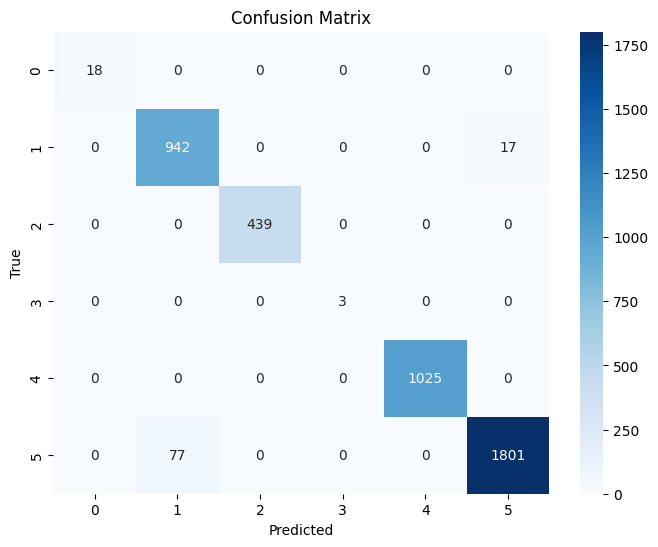

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder และ fit กับ y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล Random Forest ด้วยพารามิเตอร์ที่ดีที่สุดจาก GridSearch
rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# ใช้ KFold เพื่อแบ่งข้อมูลเป็น 4 fold
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# ทำ cross-validation
cross_val_results = cross_val_score(rf_model, X, y_encoded, cv=kf, scoring='accuracy')

# แสดงผลลัพธ์ cross-validation
print(f"Cross-Validation Scores (4-folds): {cross_val_results}")
print(f"Mean Accuracy: {np.mean(cross_val_results):.4f}")
print(f"Standard Deviation: {np.std(cross_val_results):.4f}")

# ฝึกโมเดลด้วยข้อมูลทั้งหมด
rf_model.fit(X, y_encoded)

# ทำนายผล
y_pred_rf = rf_model.predict(X)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_rf_original = label_encoder.inverse_transform(y_pred_rf)
y_original = label_encoder.inverse_transform(y_encoded)

# ประเมินผลโมเดล
print("Random Forest Performance:")
print(classification_report(y_original, y_pred_rf_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_original, y_pred_rf_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Cross-Validation Scores (4-folds): [0.94797688 0.93641618 0.92592593 0.9212963  0.92708333]
Mean Accuracy: 0.9317
Standard Deviation: 0.0095
Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      0.98      0.95       959
           2       1.00      1.00      1.00       439
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1025
           5       0.99      0.96      0.97      1878

    accuracy                           0.98      4322
   macro avg       0.99      0.99      0.99      4322
weighted avg       0.98      0.98      0.98      4322



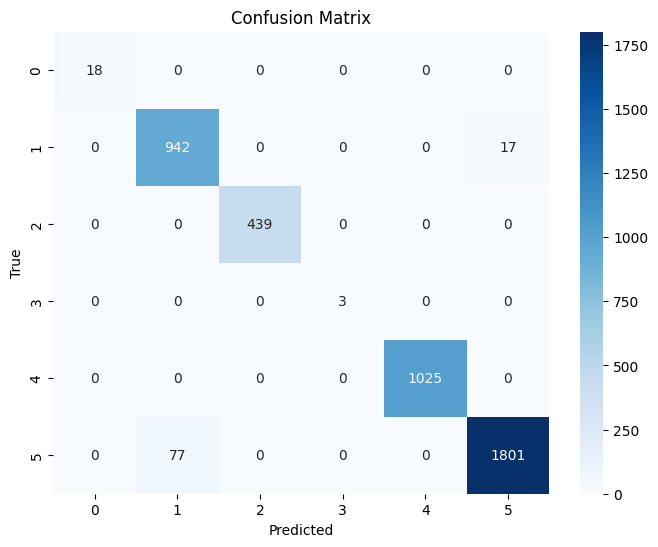

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder และ fit กับ y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล Random Forest ด้วยพารามิเตอร์ที่ดีที่สุดจาก GridSearch
rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# ใช้ KFold เพื่อแบ่งข้อมูลเป็น 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ทำ cross-validation
cross_val_results = cross_val_score(rf_model, X, y_encoded, cv=kf, scoring='accuracy')

# แสดงผลลัพธ์ cross-validation
print(f"Cross-Validation Scores (4-folds): {cross_val_results}")
print(f"Mean Accuracy: {np.mean(cross_val_results):.4f}")
print(f"Standard Deviation: {np.std(cross_val_results):.4f}")

# ฝึกโมเดลด้วยข้อมูลทั้งหมด
rf_model.fit(X, y_encoded)

# ทำนายผล
y_pred_rf = rf_model.predict(X)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_rf_original = label_encoder.inverse_transform(y_pred_rf)
y_original = label_encoder.inverse_transform(y_encoded)

# ประเมินผลโมเดล
print("Random Forest Performance:")
print(classification_report(y_original, y_pred_rf_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_original, y_pred_rf_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### drop Xn และ MCV(fl)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from GridSearch: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest (GridSearch) Performance:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.88      0.88      0.88       201
           2       0.97      0.98      0.97        96
           4       0.99      1.00      0.99       230
           5       0.93      0.93      0.93       335

    accuracy                           0.94       865
   macro avg       0.95      0.89      0.92       865
weighted avg       0.94      0.94      0.94       865



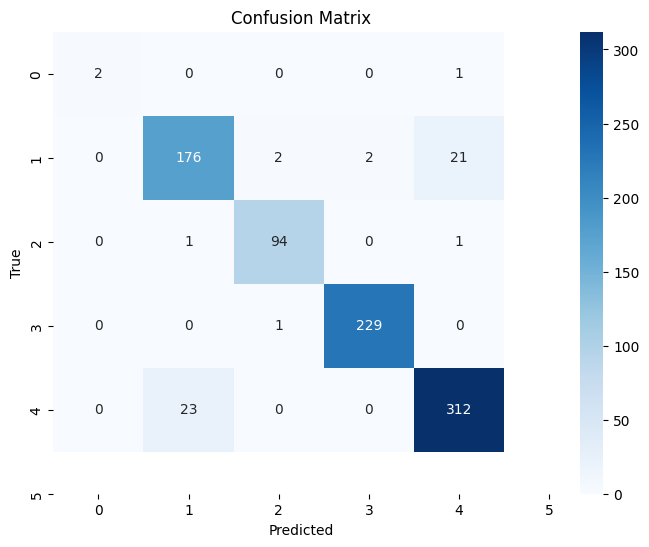

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],  # จำนวนต้นไม้ใน Random Forest
    'max_depth': [None, 10, 20, 30],   # ความลึกของแต่ละต้นไม้
    'min_samples_split': [2, 5, 10],   # จำนวนตัวอย่างขั้นต่ำที่ใช้ในการแบ่ง node
    'min_samples_leaf': [1, 2, 4],     # จำนวนตัวอย่างขั้นต่ำที่ต้องการที่ leaf node
    'bootstrap': [True, False]         # การใช้ bootstrap ในการฝึกโมเดล
}

# สร้างโมเดล Random Forest
rf_default = RandomForestClassifier(random_state=42)

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=rf_default, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_rf_default = grid_search.best_estimator_.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_rf_default_original = label_encoder.inverse_transform(y_pred_rf_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("Random Forest (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_rf_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_rf_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Cross-Validation Scores (4-folds): [0.94172063 0.93617021 0.92962963 0.90740741]
Mean Accuracy: 0.9287
Standard Deviation: 0.0130
Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       959
           2       1.00      1.00      1.00       439
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1025
           5       1.00      1.00      1.00      1878

    accuracy                           1.00      4322
   macro avg       1.00      1.00      1.00      4322
weighted avg       1.00      1.00      1.00      4322



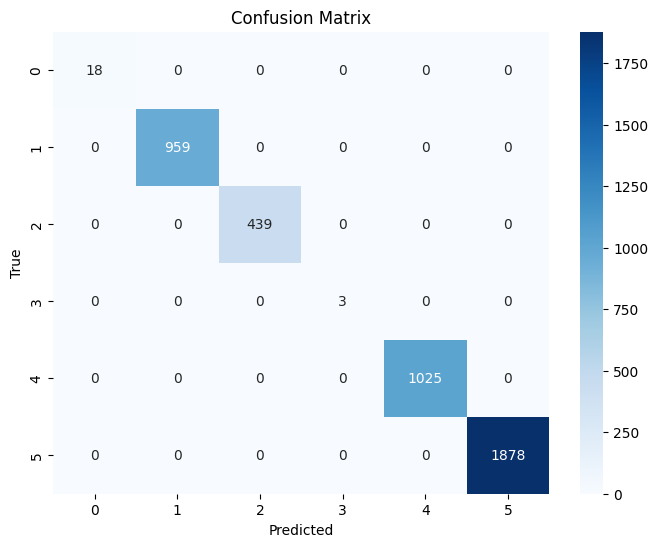

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder และ fit กับ y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล Random Forest ด้วยพารามิเตอร์ที่ต้องการ
rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# ใช้ KFold เพื่อแบ่งข้อมูลเป็น 4 fold
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# ทำ cross-validation
cross_val_results = cross_val_score(rf_model, X, y_encoded, cv=kf, scoring='accuracy')

# แสดงผลลัพธ์ cross-validation
print(f"Cross-Validation Scores (4-folds): {cross_val_results}")
print(f"Mean Accuracy: {np.mean(cross_val_results):.4f}")
print(f"Standard Deviation: {np.std(cross_val_results):.4f}")

# ฝึกโมเดลด้วยข้อมูลทั้งหมด
rf_model.fit(X, y_encoded)

# ทำนายผล
y_pred_rf = rf_model.predict(X)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_rf_original = label_encoder.inverse_transform(y_pred_rf)
y_original = label_encoder.inverse_transform(y_encoded)

# ประเมินผลโมเดล
print("Random Forest Performance:")
print(classification_report(y_original, y_pred_rf_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_original, y_pred_rf_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Cross-Validation Scores (5-folds): [0.93872832 0.93294798 0.93634259 0.92361111 0.91782407]
Mean Accuracy: 0.9299
Standard Deviation: 0.0079
Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       959
           2       1.00      1.00      1.00       439
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1025
           5       1.00      1.00      1.00      1878

    accuracy                           1.00      4322
   macro avg       1.00      1.00      1.00      4322
weighted avg       1.00      1.00      1.00      4322



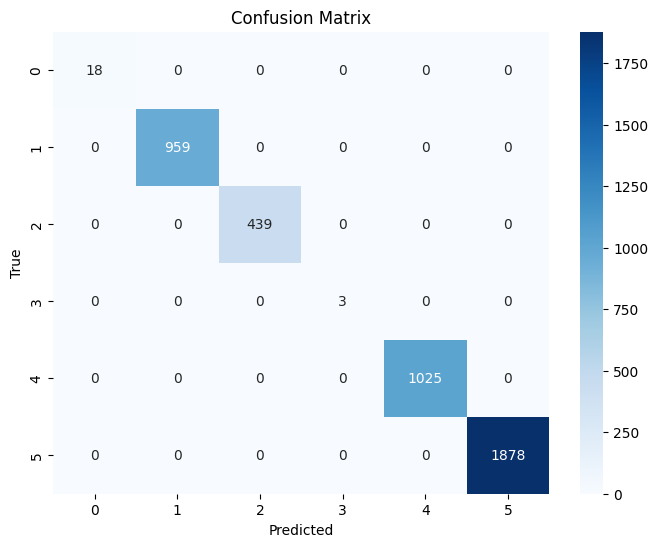

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder และ fit กับ y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล Random Forest ด้วยพารามิเตอร์ที่ต้องการ
rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# ใช้ KFold เพื่อแบ่งข้อมูลเป็น 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ทำ cross-validation
cross_val_results = cross_val_score(rf_model, X, y_encoded, cv=kf, scoring='accuracy')

# แสดงผลลัพธ์ cross-validation
print(f"Cross-Validation Scores (5-folds): {cross_val_results}")
print(f"Mean Accuracy: {np.mean(cross_val_results):.4f}")
print(f"Standard Deviation: {np.std(cross_val_results):.4f}")

# ฝึกโมเดลด้วยข้อมูลทั้งหมด
rf_model.fit(X, y_encoded)

# ทำนายผล
y_pred_rf = rf_model.predict(X)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_rf_original = label_encoder.inverse_transform(y_pred_rf)
y_original = label_encoder.inverse_transform(y_encoded)

# ประเมินผลโมเดล
print("Random Forest Performance:")
print(classification_report(y_original, y_pred_rf_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_original, y_pred_rf_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## XGBoost

### เอาทุกตัวแปรเข้า

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:42:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters from GridSearch: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
XGBoost (GridSearch) Performance:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      0.89      0.89       201
           2       0.97      0.99      0.98        96
           4       0.99      1.00      0.99       230
           5       0.94      0.93      0.94       335

    accuracy                           0.95       865
   macro avg       0.96      0.90      0.92       865
weighted avg       0.95      0.95      0.95       865



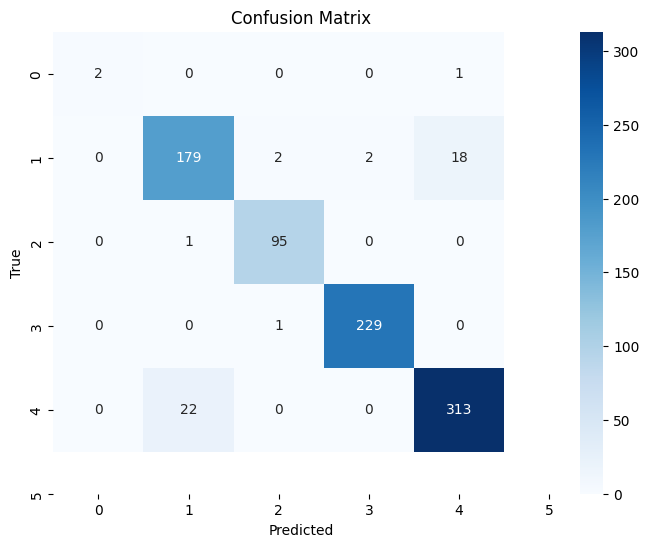

In [71]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'max_depth': [3, 6, 10],             # ความลึกของต้นไม้
    'learning_rate': [0.01, 0.1, 0.2],  # อัตราการเรียนรู้
    'n_estimators': [100, 200, 300],    # จำนวนรอบการฝึก (จำนวนต้นไม้)
    'subsample': [0.8, 0.9, 1.0],        # อัตราส่วนของข้อมูลที่ใช้ในการฝึก
    'colsample_bytree': [0.8, 0.9, 1.0], # อัตราส่วนของคุณสมบัติที่ใช้ในการฝึก
}

# สร้างโมเดล XGBoost
xgb_default = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=xgb_default, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_xgb_default = grid_search.best_estimator_.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_xgb_default_original = label_encoder.inverse_transform(y_pred_xgb_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("XGBoost (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_xgb_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_xgb_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


XGBoost Performance with 5-fold Cross Validation:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.85      0.88      0.86       959
           2       0.98      0.98      0.98       439
           3       0.00      0.00      0.00         3
           4       0.99      0.99      0.99      1025
           5       0.94      0.93      0.93      1878

    accuracy                           0.94      4322
   macro avg       0.79      0.77      0.78      4322
weighted avg       0.94      0.94      0.94      4322



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


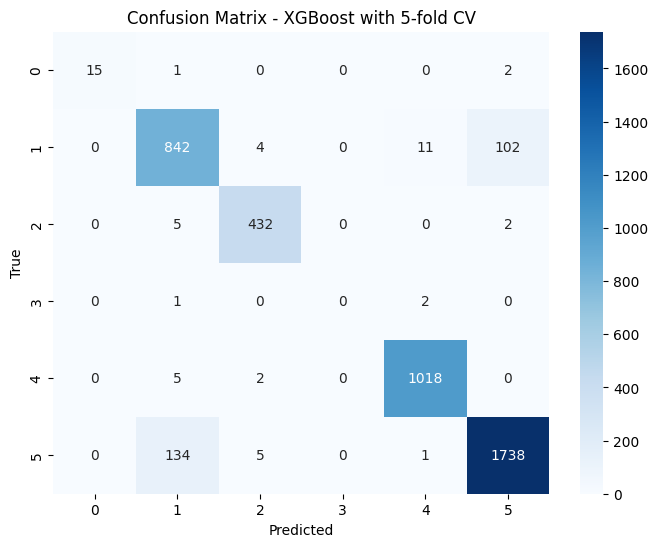

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล XGBoost ด้วยพารามิเตอร์ที่ดีที่สุดจาก GridSearch
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.9,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

# สร้าง StratifiedKFold เพื่อให้การแบ่งข้อมูลแต่ละ fold สะท้อนถึงการกระจายของข้อมูลในแต่ละคลาส
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ใช้ k-fold cross-validation
y_pred = []
y_true = []

for train_index, val_index in kf.split(X, y_encoded):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # ฝึกโมเดล
    xgb_model.fit(X_train, y_train)

    # ทำนายผล
    y_pred_fold = xgb_model.predict(X_val)

    # เก็บผลลัพธ์
    y_pred.extend(y_pred_fold)
    y_true.extend(y_val)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_original = label_encoder.inverse_transform(y_pred)
y_true_original = label_encoder.inverse_transform(y_true)

# ประเมินผลโมเดล
print("XGBoost Performance with 5-fold Cross Validation:")
print(classification_report(y_true_original, y_pred_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_true_original, y_pred_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost with 5-fold CV')
plt.show()


### drop Xn และ MCV(fl)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:05:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters from GridSearch: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}
XGBoost (GridSearch) Performance:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      0.89      0.89       201
           2       0.98      0.99      0.98        96
           4       1.00      1.00      1.00       230
           5       0.94      0.94      0.94       335

    accuracy                           0.95       865
   macro avg       0.96      0.90      0.92       865
weighted avg       0.95      0.95      0.95       865



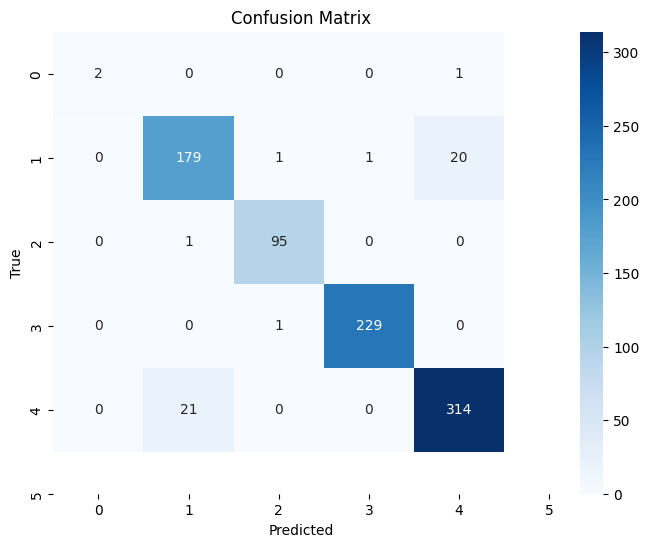

In [72]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น train และ test
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder และ fit กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# กำหนดพารามิเตอร์ที่ต้องการใช้ใน GridSearch
param_grid = {
    'max_depth': [3, 6, 10],             # ความลึกของต้นไม้
    'learning_rate': [0.01, 0.1, 0.2],  # อัตราการเรียนรู้
    'n_estimators': [100, 200, 300],    # จำนวนรอบการฝึก (จำนวนต้นไม้)
    'subsample': [0.8, 0.9, 1.0],        # อัตราส่วนของข้อมูลที่ใช้ในการฝึก
    'colsample_bytree': [0.8, 0.9, 1.0], # อัตราส่วนของคุณสมบัติที่ใช้ในการฝึก
}

# สร้างโมเดล XGBoost
xgb_default = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# ใช้ GridSearchCV เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(estimator=xgb_default, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# แสดงพารามิเตอร์ที่ดีที่สุดจาก GridSearch
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

# ทำนายผลโดยใช้โมเดลที่ดีที่สุด
y_pred_xgb_default = grid_search.best_estimator_.predict(X_test)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_xgb_default_original = label_encoder.inverse_transform(y_pred_xgb_default)
y_test_original = label_encoder.inverse_transform(y_test_encoded)

# ประเมินผลโมเดล
print("XGBoost (GridSearch) Performance:")
print(classification_report(y_test_original, y_pred_xgb_default_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_xgb_default_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


XGBoost Performance with 5-fold Cross Validation:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.85      0.87      0.86       959
           2       0.98      0.98      0.98       439
           3       0.00      0.00      0.00         3
           4       0.99      0.99      0.99      1025
           5       0.94      0.92      0.93      1878

    accuracy                           0.93      4322
   macro avg       0.78      0.76      0.77      4322
weighted avg       0.93      0.93      0.93      4322



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


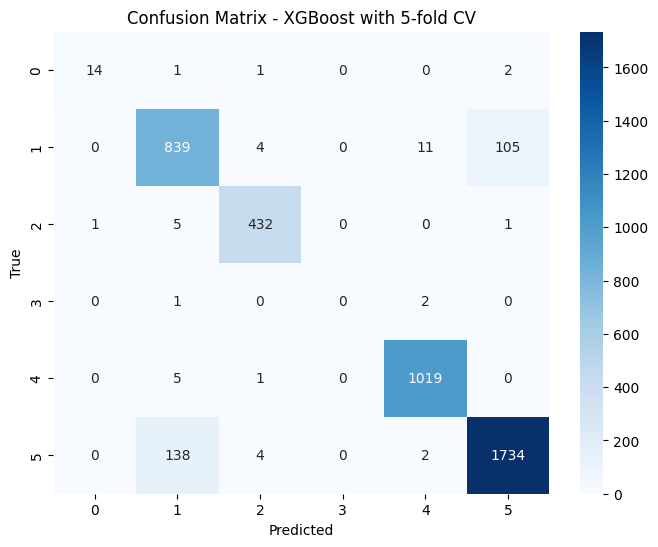

In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# แบ่งข้อมูลเป็น X และ y
X = train_set.drop(columns=['Thal_Group', 'Thal_Group_encoded', 'id number','Xn','MCV(fl)'])  # เลือกฟีเจอร์ที่ใช้ฝึกโมเดล
y = train_set['Thal_Group_encoded']  # คอลัมน์ที่ต้องการทำนาย

# สร้าง LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# สร้างโมเดล XGBoost ด้วยพารามิเตอร์ที่ดีที่สุดจาก GridSearch
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.9,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

# สร้าง StratifiedKFold เพื่อให้การแบ่งข้อมูลแต่ละ fold สะท้อนถึงการกระจายของข้อมูลในแต่ละคลาส
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ใช้ k-fold cross-validation
y_pred = []
y_true = []

for train_index, val_index in kf.split(X, y_encoded):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # ฝึกโมเดล
    xgb_model.fit(X_train, y_train)

    # ทำนายผล
    y_pred_fold = xgb_model.predict(X_val)

    # เก็บผลลัพธ์
    y_pred.extend(y_pred_fold)
    y_true.extend(y_val)

# แปลงค่าที่ทำนายกลับเป็นค่าดั้งเดิม (จากการ encode)
y_pred_original = label_encoder.inverse_transform(y_pred)
y_true_original = label_encoder.inverse_transform(y_true)

# ประเมินผลโมเดล
print("XGBoost Performance with 5-fold Cross Validation:")
print(classification_report(y_true_original, y_pred_original))

# คำนวณและแสดง Confusion Matrix
conf_matrix = confusion_matrix(y_true_original, y_pred_original)

# แสดง Confusion Matrix ในรูป Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost with 5-fold CV')
plt.show()


## สรุป Model

โมเดลที่ดีที่สุดจากแต่ละโมเดล ได้แก่
1. Decision Tree \
เอาเข้าทุกตัวแปร \

Cross-Validation Scores (5-folds): [0.90520231 0.90404624 0.90972222 0.90509259 0.89351852]\

Mean Accuracy: 0.9035 \
Standard Deviation: 0.0054 \

Decision Tree Performance: \

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       959
           2       1.00      1.00      1.00       439
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1025
           5       1.00      1.00      1.00      1878
       accuracy                        1.00      4322
       macro avg   1.00      1.00      1.00      4322
       weighted avg1.00      1.00      1.00      4322



2. (Short) Decision Tree \
เอาเข้าทุกตัวแปร \

Best Parameters from GridSearch: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2} \

Decision Tree (GridSearch) Performance:\

                precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      0.86      0.87       201
           2       0.97      0.99      0.98        96
           4       1.00      0.99      0.99       230
           5       0.92      0.94      0.93       335

        accuracy                       0.94       865
        macro avg  0.95      0.89      0.92       865
        weighted   0.94      0.94      0.94       865
          avg




3. Naive Bayes \

Drop Xn and MCV(fl) \

Best Parameters from GridSearch: {'var_smoothing': 1e-09} \
Naive Bayes (GridSearch) Performance:\

                precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.59      0.42      0.49       201
           2       0.49      0.83      0.62        96
           3       0.00      0.00      0.00         0
           4       0.96      0.88      0.92       230
           5       0.86      0.87      0.87       335

       accuracy                        0.76       865
       macro avg   0.55      0.61      0.56       865
       weighted    0.78      0.76      0.76       865
         avg

4. Random Forest \

drop Xn and MCV(fl) \

Best Parameters from GridSearch: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} \

Cross-Validation Scores (5-folds): [0.93872832 0.93294798 0.93634259 0.92361111 0.91782407] \

Mean Accuracy: 0.9299 \
Standard Deviation: 0.0079 \
Random Forest Performance: \
       
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       959
           2       1.00      1.00      1.00       439
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1025
           5       1.00      1.00      1.00      1878

     accuracy                          1.00      4322
     macro avg     1.00      1.00      1.00      4322
     weighted avg  1.00      1.00      1.00      4322


5. XGBoost \

drop Xn and MCV(fl) \

Best Parameters from GridSearch: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}\

XGBoost (GridSearch) Performance:\

                precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.89      0.89      0.89       201
           2       0.98      0.99      0.98        96
           4       1.00      1.00      1.00       230
           5       0.94      0.94      0.94       335

       accuracy                        0.95       865
       macro avg   0.96      0.90      0.92       865
       weighted    0.95      0.95      0.95       865
         avg


จากโมเดลทั้งหมด มี 2 โมเดลที่ทำนายได้ดีที่สุดคือ Decision Tree และ Random Forest ซึ่งมีค่า Accuracy , Precision , Recall, F1-score เท่ากัน\
เนื่องจาก Random Forest มีค่า Cross-Validation Scores สูงกว่า
ดังนั้นส่วนตัวจึงเลือกใช้ Random Forest Model

## Test

**Random Forest** \
drop Xn and MCV(fl) \

**Best Parameters from GridSearch**: \
{'bootstrap': False,\
'max_depth': 20,\
'min_samples_leaf': 1,\
'min_samples_split': 5,\
'n_estimators': 100} \

In [93]:
test_set = pd.read_csv('/content/drive/MyDrive/BSC_DPDM24/Model/X_test.csv')

In [94]:
test_set.head()

,id number,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|
0,66z133,38.0,12.4,37.0,78.0,2.7,1.3,75.4,4.743590,26.140541,33.513514,36.056410,11.256410,2.0,0.859459,1.718919
1,66z297,28.0,12.8,39.4,82.0,2.7,0.0,97.3,4.804878,26.639594,32.487310,38.795122,13.195122,2.0,0.360406,0.720812
2,66u491,78.0,10.9,33.9,79.0,3.1,0.0,96.9,4.291139,25.401180,32.153392,42.008861,20.208861,1.0,1.598820,1.598820
3,66x072,65.0,10.9,33.9,79.0,3.0,0.2,87.9,4.291139,25.401180,32.153392,42.008861,20.208861,1.0,1.598820,1.598820
4,67m031,17.0,11.5,36.0,78.0,2.8,0.8,79.6,4.615385,24.916667,31.944444,38.884615,15.884615,2.0,2.083333,4.166667


In [91]:
train_set.head()

,id number,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|,Thal_Group,Thal_Group_encoded
0,67d169,25.0,11.1,34.0,78.0,3.2,0.0,55.9,4.358974,25.464706,32.647059,40.341026,18.141026,2.0,1.535294,3.070588,Abnormal_variants,0
1,67l168,32.0,13.9,42.0,86.0,3.7,0.3,54.8,5.197674,28.859060,33.557047,35.802326,5.802326,6.0,1.859060,11.154362,Abnormal_variants,0
2,67i267,43.0,10.1,31.0,78.0,2.6,0.3,56.2,3.974359,25.412903,32.580645,43.725641,23.525641,2.0,1.587097,3.174194,Abnormal_variants,0
3,67e248,33.0,12.9,38.0,76.0,3.0,0.2,61.2,5.000000,25.800000,33.947368,32.300000,6.500000,4.0,1.200000,4.800000,Abnormal_variants,0
4,67h277,23.0,12.9,40.0,78.0,3.1,0.0,55.6,5.128205,25.155000,32.250000,34.171795,8.371795,2.0,1.845000,3.690000,Abnormal_variants,0


In [95]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

# เตรียมข้อมูล Train
X_train = train_set.drop(columns=['Thal_Group','Thal_Group_encoded', 'id number', 'Xn', 'MCV(fl)'])  # ลบคอลัมน์ที่ไม่ใช้
y_train = train_set['Thal_Group_encoded']  # ค่าที่ต้องการทำนาย

# ใช้ LabelEncoder กับ y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# กำหนดโมเดล Random Forest ด้วยพารามิเตอร์ที่ดีที่สุดจาก GridSearch
rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# ทำ 5-fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train_encoded, cv=kf, scoring='accuracy')

# แสดงค่าเฉลี่ยของ Accuracy จาก Cross-Validation
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# Train โมเดลบน Train Set เต็ม ๆ
rf_model.fit(X_train, y_train_encoded)

# เตรียมข้อมูล Test (ไม่มี y)
X_test = test_set.drop(columns=['id number', 'Xn', 'MCV(fl)'])  # ลบคอลัมน์ที่ไม่ใช้

# ทำนายผลลัพธ์จาก Test Set
y_pred = rf_model.predict(X_test)

# แปลงค่าที่โมเดลทายกลับเป็น Label จริง
y_pred_original = label_encoder.inverse_transform(y_pred)

# สร้าง DataFrame สำหรับผลลัพธ์
df_results = test_set[['id number']].copy()  # ใช้ id number เป็น index
df_results['Predicted_Thal_Group'] = y_pred_original  # ใส่ค่าที่โมเดลทาย

# บันทึกผลลัพธ์เป็น CSV
df_results.to_csv('predicted_results.csv', index=False)

# แสดงตัวอย่างของ DataFrame ผลลัพธ์
print(df_results.head())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mean CV Accuracy: 0.9290
  id number  Predicted_Thal_Group
0    66z133                     5
1    66z297                     5
2    66u491                     5
3    66x072                     5
4    67m031                     5


In [97]:
df_results.head()

,id number,Predicted_Thal_Group
0,66z133,5
1,66z297,5
2,66u491,5
3,66x072,5
4,67m031,5


In [98]:
# สร้าง Mapping: Thal_Group_encoded → Thal_Group
thal_mapping = train_set[['Thal_Group', 'Thal_Group_encoded']].drop_duplicates().set_index('Thal_Group_encoded')['Thal_Group'].to_dict()

In [99]:
thal_mapping

{0: 'Abnormal_variants',
 2: 'Beta_thal_related',
 4: 'HbE_related',
 1: 'Alpha_thal_related',
 3: 'Complex_genotypes',
 5: 'Normal'}

In [102]:
df_results['ThaI_Group'] = df_results['Predicted_Thal_Group'].map(thal_mapping)
df_results.head()

,id number,Predicted_Thal_Group,ThaI_Group
0,66z133,5,Normal
1,66z297,5,Normal
2,66u491,5,Normal
3,66x072,5,Normal
4,67m031,5,Normal


In [103]:
df_results['ThaI_Group'].to_csv('y_predicted.csv', index=False)